#### Importing necessary Libraries

In [71]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Loading the data

In [73]:
df=pd.read_csv('Advertising_Data.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Data Analysis

In [74]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [76]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [77]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Analysing Whether there is a linear relation between expenditure incurred  on TV Advertisement and Sales

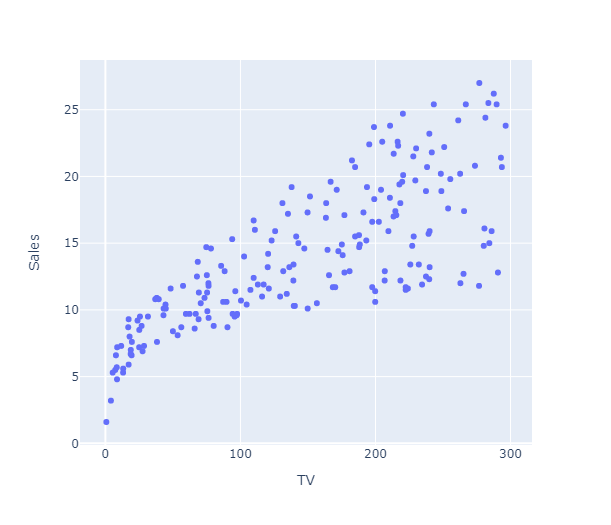

In [78]:
fig=px.scatter(df,x='TV',y='Sales')
#fig.show()
Image.open("fig.png")


#### Analysing Whether there is a linear relation between expenditure incurred on Radio Advertisement and Sales

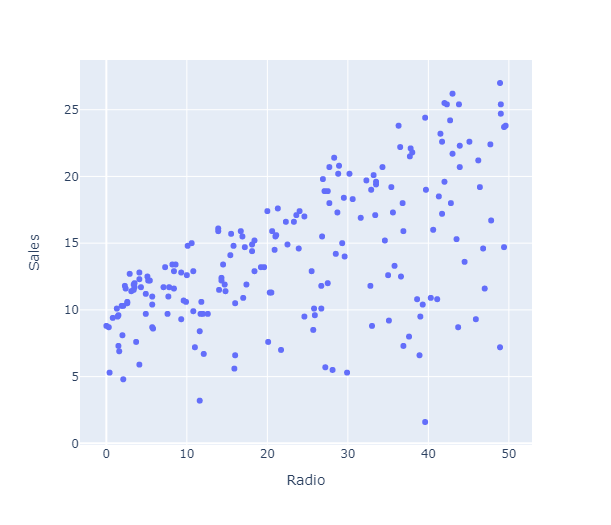

In [79]:
fig1=px.scatter(df,x='Radio',y='Sales')
#fig1.show()
Image.open("fig1.png")

#### Analysing Whether there is a linear relation between expenditure incurred on Newspaper Advertisement and Sales

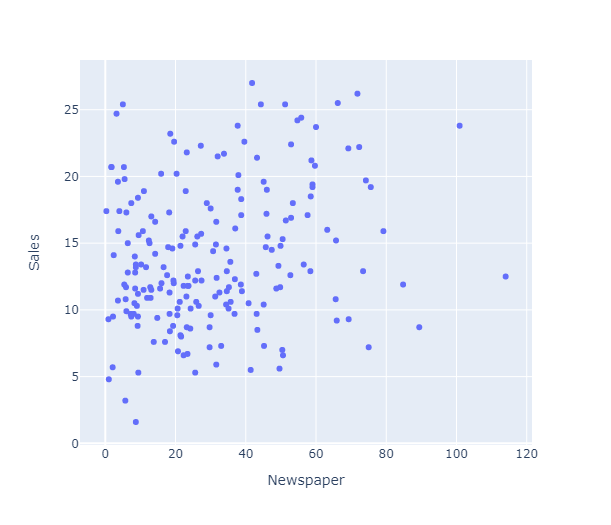

In [80]:
fig2=px.scatter(df,x='Newspaper',y='Sales')
#fig2.show()
Image.open("fig2.png")

#### Checking Multi-Colinearity between features using Pearson Graph 

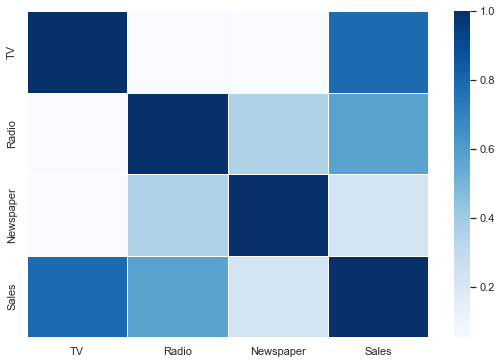

In [81]:
sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap='Blues')
plt.show()

**We can generally use PEARSON GRAPH to find MULTI-COLINEARITY But,there is another way to find multicolinearity that is:-**

**VIF(VARIANCE INFLATION FACTOR)**

**If VIF >10 , then we are supposed to consider a data set as a higly colinear**




**There are 2 ways to make linear regressions Models:**

   **1.Sckit Learn.**
   **2.Statistical Model Approach(Ordinary Least Squared(OLS))**
    
* The Statistical Model Approach is just going to give us statistical way of doing impact analysis of a model that we are trying to build or may be a feauture(x),that we are trying to pick and choose. 

* Difference between Sckit Learn & Statistical Model Approach:---->>>
   Statistical Model Approach is not going to give us final version of the model that we can productinize,this is just going to give us some sort of statistics where we can run our analysis to understand the impact/relation
   
* I have used Statistical Model Approach to do impact analysis as below:

In [82]:
lm3=smf.ols(formula='Sales ~ TV+Radio+Newspaper',data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        21:36:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**P-value means the significance level**

**P-value is going to give us how many experiments are going to fail out of100 experiments**

**In the above case P-value of Newspaper is 0.86 which means that out of 100 experiments,86 experiments are going to fail**

**Here we have assumed signifance level to be 0.05 i.e 5% means out of 100 experiments if only 5 experiments are going to fail that only feature value we are going to consider**

**Hence we have excluded Expenditure on Newspaper Advertisment  further while building the prediction model, also we found that there is no linear co-relation between Newspaper Avertisment and Sales in the above Analysis of Newspaper Advertisement and Sales Graph**


In [83]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [84]:
x=df[['TV','Radio']]

In [85]:
y=df['Sales']

In [86]:
x.columns

Index(['TV', 'Radio'], dtype='object')

**Now to our build our prediction model,we divide our dataset into 2 parts,i.e 75% of the dataset  to train the model and balance 25% to test our model**

In [87]:
train_test_split(x,y,test_size=0.25)

[        TV  Radio
 159  131.7   18.4
 134   36.9   38.6
 162  188.4   18.1
 82    75.3   20.3
 169  284.3   10.6
 ..     ...    ...
 55   198.9   49.4
 186  139.5    2.1
 64   131.1   42.8
 8      8.6    2.1
 38    43.1   26.7
 
 [150 rows x 2 columns],
         TV  Radio
 17   281.4   39.6
 129   59.6   12.0
 195   38.2    3.7
 66    31.5   24.6
 183  287.6   43.0
 10    66.1    5.8
 73   129.4    5.7
 75    16.9   43.7
 4    180.8   10.8
 54   262.7   28.8
 60    53.5    2.0
 59   210.7   29.5
 102  280.2   10.1
 16    67.8   36.6
 110  225.8    8.2
 168  215.4   23.6
 24    62.3   12.6
 178  276.7    2.3
 120  141.3   26.8
 184  253.8   21.3
 122  224.0    2.4
 138   43.0   25.9
 94   107.4   14.0
 142  220.5   33.2
 88    88.3   25.5
 46    89.7    9.9
 22    13.2   15.9
 45   175.1   22.5
 97   184.9   21.0
 105  137.9   46.4
 135   48.3   47.0
 143  104.6    5.7
 165  234.5    3.4
 47   239.9   41.5
 193  166.8   42.0
 63   102.7   29.6
 172   19.6   20.1
 196   94.2    4.9
 23 

**Allocating the train & test datasets by creating respective variables**

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [89]:
x_train

,TV,Radio
74,213.4,24.6
197,177.0,9.3
52,216.4,41.7
71,109.8,14.3
41,177.0,33.4
...,...,...
58,210.8,49.6
172,19.6,20.1
90,134.3,4.9
43,206.9,8.4


In [90]:
y_train

74     17.0
197    12.8
52     22.6
71     12.4
41     17.1
       ... 
58     23.8
172     7.6
90     11.2
43     12.9
36     25.4
Name: Sales, Length: 150, dtype: float64

In [91]:
x_test

,TV,Radio
32,97.2,1.5
53,182.6,46.2
68,237.4,27.5
24,62.3,12.6
8,8.6,2.1
61,261.3,42.7
54,262.7,28.8
135,48.3,47.0
86,76.3,27.5
102,280.2,10.1


In [92]:
y_test

32      9.6
53     21.2
68     18.9
24      9.7
8       4.8
61     24.2
54     20.2
135    11.6
86     12.0
102    14.8
146    13.2
151    11.6
20     18.0
14     19.0
6      11.8
131    12.7
176    20.2
38     10.1
133    19.6
117     9.4
67     13.4
152    16.6
130     1.6
114    14.6
162    14.9
157    10.1
104    20.7
85     15.2
159    12.9
39     21.5
18     11.3
79     11.0
17     24.4
118    15.9
76      6.9
99     17.2
128    24.7
51     10.7
185    22.6
194    17.3
158     7.3
16     12.5
101    23.8
22      5.6
91      7.3
113    15.9
83     13.6
70     18.3
167    12.2
19     14.6
Name: Sales, dtype: float64

**Now we build our Prediction Model using LinearRegression**

In [93]:
lr=LinearRegression()

In [94]:
lr_fit=lr.fit(x_train,y_train)
lr_fit

LinearRegression()

In [95]:
file='Linear_Regression.sav'
pickle.dump(lr_fit,open(file,'wb'))

In [96]:
lr.coef_   #m

array([0.04520618, 0.19485772])

In [97]:
lr.intercept_ #c

2.7942706522473664

In [98]:
lr.score(x_test,y_test)

0.8774100922279795

**lr.score means R**2 **which defines the accuracy of the model,from below as per R**2 **our prediction model is around 88% accurate**

In [99]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [133]:
lr.predict([[151.5,41.3]])

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([17.69063022])

**Now we test the accuracy of the model using Adjusted R2**

**But why to test the accuracy of the model using Adjusted R2,when we have already tested the accuracy of the model using R2,**

**It is because the accuracy of the model under R2 will increase as and when we increase the no of features(x)**

**But the Adjusted R2 will remain unaffected inspite of No of features(x) we take , so R2 is less reliable then Adjusted R2**

In [103]:
def adj_r2(x,y):
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [104]:
adj_r2(x_test,y_test)

0.8721935004078936

**Regularization**

**Regularization is a technique by we  control the error term so that we will be able to control  degress of freedom of m & c,as our model is overfitted or not  dependends on the value of m & c ,so that we will be able to generalize our model in a better way**

**There are different ways to do Regularization**

**1.L1-LASSO(Least Absolute Shrinkage & Selection Operator)**

**2.L2-RidgeCV**

**3.L3-ElasticNet**

In [105]:
lassocv=LassoCV(alphas=None,cv=10,max_iter=2000000,normalize=True)

In [106]:
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=2000000, normalize=True)

In [107]:
lassocv.alpha_

0.0003209869294295881

In [108]:
lasso=Lasso(alpha=lassocv.alpha_)

In [109]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0003209869294295881)

In [110]:
lasso.score(x_test,y_test)

0.8774106349328399

In [111]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)

In [112]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.34749637, 7.34890463, 0.03325117, 8.86141038, 5.10120451,
       3.15359416, 1.81693441, 3.66654203, 2.53478468, 3.66004189,
       9.38664531, 7.99580309, 7.28362687, 0.60882512, 3.53443008,
       0.1937405 , 3.88465175, 9.52737508, 4.8298046 , 1.35515824,
       7.72005699, 7.91597998, 6.23307813, 1.88925803, 4.97889067,
       9.00976267, 4.3532469 , 4.7058534 , 6.56106965, 3.14104307,
       9.50067022, 2.53585953, 4.13192078, 4.68496226, 3.2545316 ,
       3.43040806, 8.68873061, 1.95247108, 4.16187045, 6.08435495,
       8.67942253, 5.15326748, 3.03384576, 6.53822616, 3.20556119,
       8.63415402, 3.26355483, 5.30421579, 8.93189552, 4.33133356]),
        cv=10, normalize=True)

In [113]:
ridgecv.alpha_

0.03325117374607278

In [114]:
ridge_lr=Ridge(alpha=ridgecv.alpha_)

In [115]:
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.03325117374607278)

In [116]:
ridge_lr.score(x_test,y_test)

0.877410169846764

In [117]:
elastic=ElasticNetCV(alphas=None,cv=10)
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [118]:
elastic.alpha_

0.6747614346666666

In [119]:
elastic.l1_ratio_

0.5

In [120]:
elastic_lr=ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)
elastic_lr

ElasticNet(alpha=0.6747614346666666)

In [121]:
elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=0.6747614346666666)

In [122]:
elastic_lr.score(x_test,y_test)

0.8780696307204809

**The accuracy of our prediction model under LASSOCV,RidgeCV,ElasticNet and Adjusted R2 is almost same so now we can say that our prediction model is A STABLE MODEL and not a overfitted one**

**Now we do Preciction of Sales on the basis of Expenditure Incurrred on Advertisments in TV & Radio**

In [134]:
lr.predict(([[100000,500000]]))

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([101952.27348176])

In [124]:
saved_model=pickle.load(open(file,'rb'))

**Predicting Sales by Loading the Saved Model**

In [125]:
saved_model.predict(([[50000000,95000000]]))

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([20771795.2855553])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [127]:
saved_model.predict(([[500000000,50000000]]))

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([32345976.72104254])

In [128]:
saved_model.predict(([[10000000,50000000]]))

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([10194950.71538126])